In [1]:
train_df <- read.csv("../Data/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존여부, 0 = 사망, 1 = 생존 
- Pclass : 티켓 등급, 1 = 1등급, 2 = 2등급, 3 = 3등급
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Fare : 운임
- Cabin : 객실 번호
- Embarked : 탑승항구, C = Chersbourg, Q = Queenstown, S = Southhampton

In [4]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))
colSums(is.na(train_df))

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [5]:
177 / 891
# na값 빼고 해봐야지 나중에(생각날때 만들기)

[1] 0.1986532

In [6]:
# train_df$Age가 NA인것 빼고 데이터셋 만들기
sum(is.na(subset(train_df, !is.na(Age))))

[1] 0

In [7]:
# Survived 기준으로 DataSet 정렬
options(warn = -1)
library(dplyr)
train_df <- arrange(train_df, (Survived))
print(head(train_df))
table(train_df$Survived)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S



  0   1 
549 342 

In [8]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [9]:
# 정렬된 크기 확인하기
dim(train_df)

[1] 891  12

# Target Column : Survived 분석 및 확인


In [10]:
table(train_df$Survived)


  0   1 
549 342 

In [11]:
# Survived의 생존과 사망 Count 확인 및 비율 계산하기
# 사망자수
ndeath <- nrow(subset(train_df, Survived == 0)); ndeath
# 생존자수
nlive <- nrow(subset(train_df, Survived == 1)); nlive
# 생존자수의 비율
nlive / (ndeath + nlive)

[1] 549

[1] 342

[1] 0.3838384

> Target 컬럼은 비율이 일정해야 하고 Feature 컬럼은 비율 차이가 많이 날수록 좋다

In [12]:
# 생존과 사망 비율을 Pie Chart로 생성
library(plotrix)

In [13]:
liveRatio <- data.frame(사망=ndeath, 생존=nlive)
label <- paste(colnames(liveRatio),"\n",round(100 * liveRatio / (ndeath + nlive),2), "%")
label

[1] "사망 \n 61.62 %" "생존 \n 38.38 %"

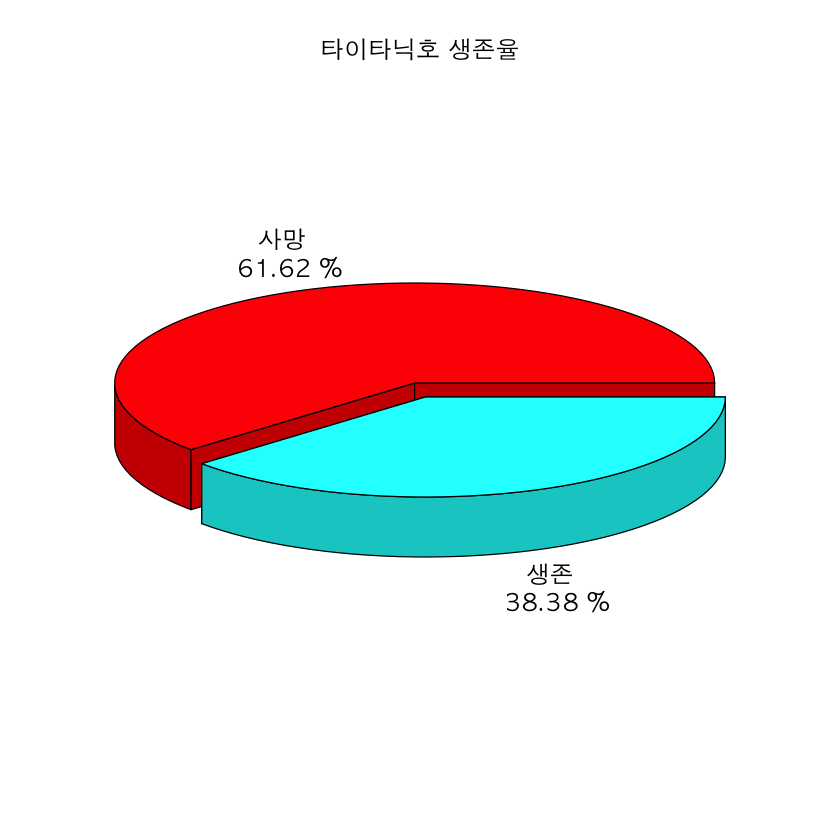

In [14]:
par(family = "AppleGothic")
pie3D(t(liveRatio),
      main = "타이타닉호 생존율",
      labels = label,
      explode = 0.05,
      labelcex = 1.2
     )

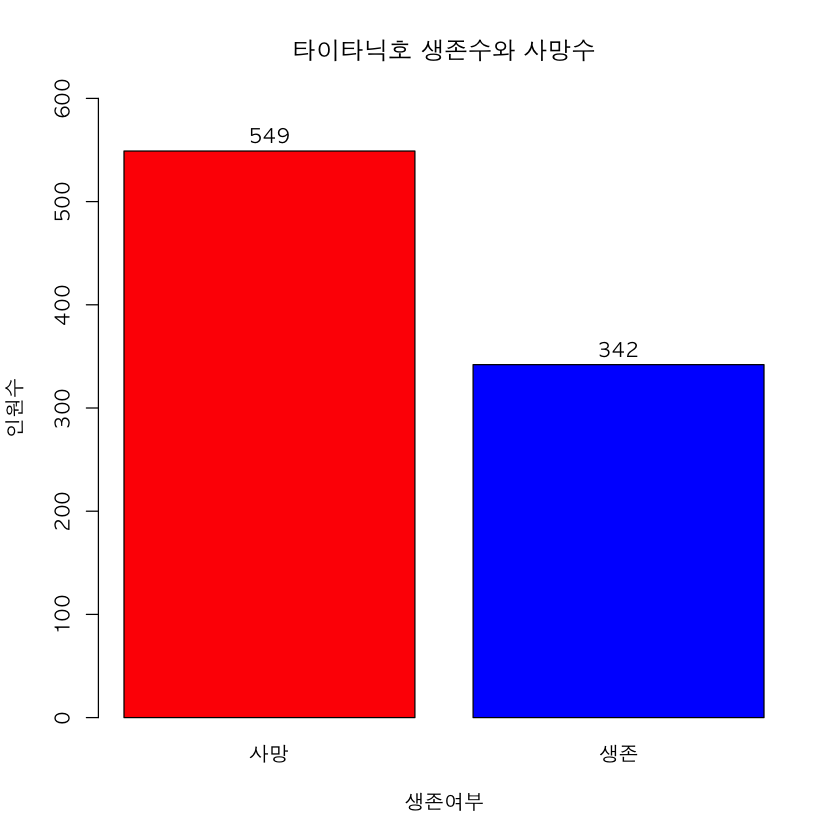

In [15]:
par(family = "AppleGothic")
barplot(t(liveRatio),
        beside = T,
        ylim = c(0, 600),
        names = colnames(liveRatio),
        space = 0.2,
        col = c("red", "blue"),
        main = "타이타닉호 생존수와 사망수",
        xlab = "생존여부",
        ylab = "인원수"
       )
for (i in 1:2) {
    text(1.2 * i - 0.5,liveRatio[i] + 15,liveRatio[i] )
}


> Target Column으로 Survived를 선정

---
# Feature Column 찾기

In [16]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Sex 컬럼 확인

In [17]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] male   female
Levels: female male

In [18]:
# 여성과 남성의 인원 확인
femaleCount <- nrow(subset(train_df, Sex == "female")); femaleCount
maleCount <- nrow(subset(train_df, Sex == "male")); maleCount

[1] 314

[1] 577

In [19]:
# 여성의 생존 수와 사망 수
liveFemaleCount <- nrow(subset(train_df, (Sex == "female" & Survived == 1))); liveFemaleCount
deathFemaleCount <- nrow(subset(train_df, (Sex == "female" & Survived == 0))); deathFemaleCount

[1] 233

[1] 81

In [20]:
# 남성성의 생존 수와 사망 수
liveMaleCount <- nrow(subset(train_df, (Sex == "male" & Survived == 1))); liveMaleCount
deathMaleCount <- nrow(subset(train_df, (Sex == "male" & Survived == 0))); deathMaleCount

[1] 109

[1] 468

In [21]:
# 여성의 생존율과 사망율
cat("여성의 생존율 :",round(liveFemaleCount / femaleCount * 100, 2), "%\n")
cat("여성의 사망율 :",round(deathFemaleCount / femaleCount * 100, 2), "%")

여성의 생존율 : 74.2 %
여성의 사망율 : 25.8 %

In [22]:
# 여성의 생존율과 사망율
cat("남성의 생존율 :",round(liveMaleCount / maleCount  * 100, 2), "%\n")
cat("남성의 사망율 :",round(deathMaleCount / maleCount  * 100, 2), "%")

남성의 생존율 : 18.89 %
남성의 사망율 : 81.11 %

> Sex 컬럼은 Feature로 적합   
> [Survived] <- [Sex]

In [23]:
maleRatio <- data.frame(사망=round(deathMaleCount / maleCount  * 100, 2),
                  생존=round(liveMaleCount / maleCount  * 100, 2))
femaleRatio <- data.frame(사망=round(deathFemaleCount / femaleCount  * 100, 2),
                  생존=round(liveFemaleCount / femaleCount  * 100, 2))

In [24]:
maleLabel <- paste(colnames(maleRatio),"\n",maleRatio, "%")
femaleLabel <- paste(colnames(femaleRatio),"\n",femaleRatio, "%")

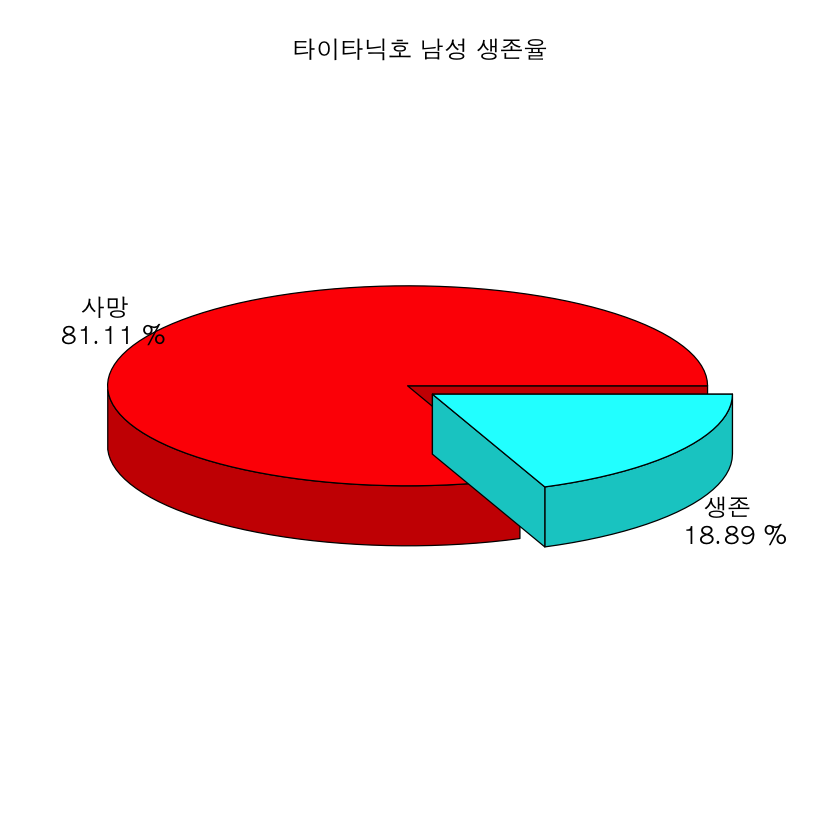

In [25]:
par(family = "AppleGothic")
pie3D(t(maleRatio),
      main = "타이타닉호 남성 생존율",
      labels = maleLabel,
      explode = 0.05,
      labelcex = 1.2
     )

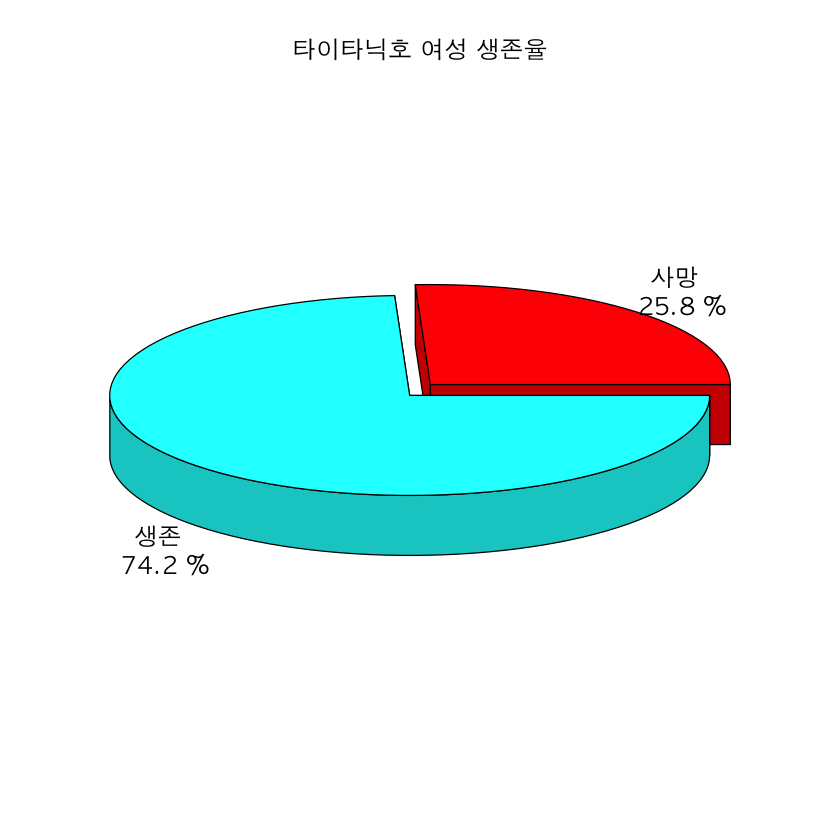

In [26]:
par(family = "AppleGothic")
pie3D(t(femaleRatio),
      main = "타이타닉호 여성 생존율",
      labels = femaleLabel,
      explode = 0.05,
      labelcex = 1.2
     )

In [27]:
sexCount <- data.frame(여성=femaleCount, 남성=maleCount)

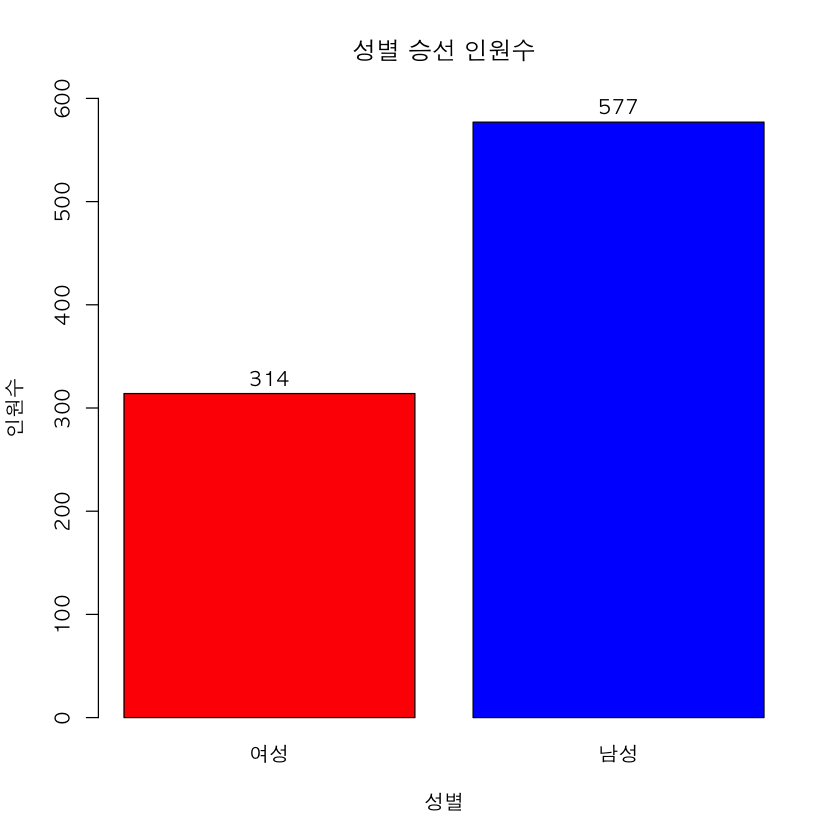

In [28]:
par(family = "AppleGothic")
barplot(t(sexCount),
        beside = T,
        ylim = c(0, 600),
        names = colnames(sexCount),
        space = 0.2,
        col = c("red", "blue"),
        main = "성별 승선 인원수",
        xlab = "성별",
        ylab = "인원수"
       )
for (i in 1:2) {
    text(1.2 * i - 0.5,sexCount[i] + 15,sexCount[i])
}

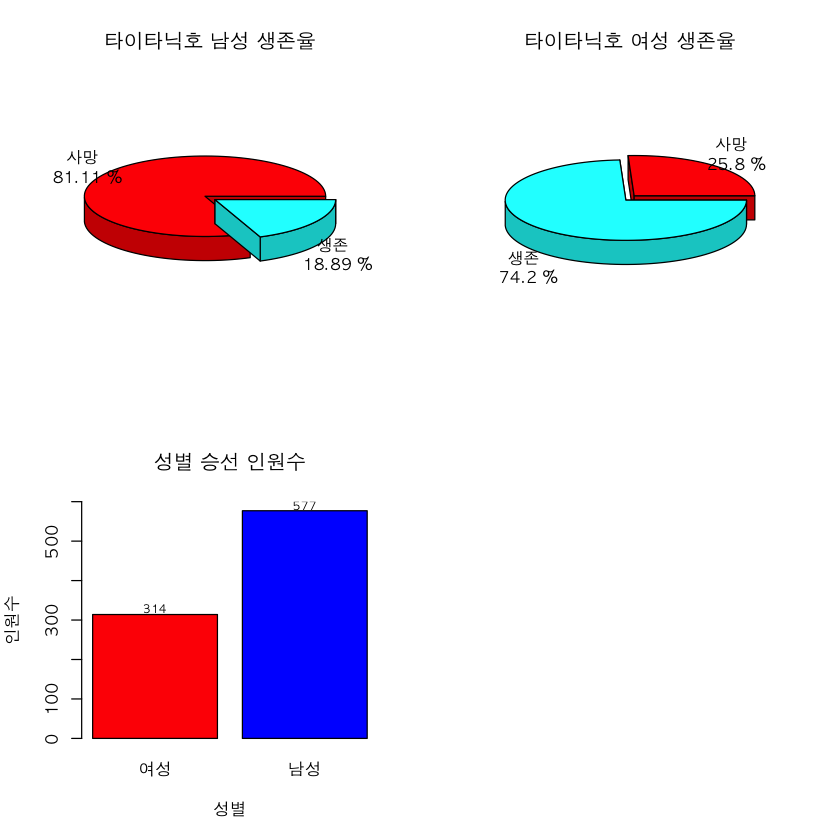

In [29]:
par(mfrow = c(2,2), family = "AppleGothic")

pie3D(t(maleRatio),
      main = "타이타닉호 남성 생존율",
      labels = maleLabel,
      explode = 0.05,
      labelcex = 0.8
     )

pie3D(t(femaleRatio),
      main = "타이타닉호 여성 생존율",
      labels = femaleLabel,
      explode = 0.05,
      labelcex = 0.8
     )

barplot(t(sexCount),
        beside = T,
        ylim = c(0, 600),
        names = colnames(sexCount),
        space = 0.2,
        col = c("red", "blue"),
        main = "성별 승선 인원수",
        xlab = "성별",
        ylab = "인원수"
       )
for (i in 1:2) {
    text(1.2 * i - 0.5,sexCount[i] + 15,sexCount[i], cex = 0.7, )
}

In [30]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티켓 등급 분석

In [31]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [32]:
# 1~3등급 객실의 여성, 남성 생존율
j <- 1
ratio <- c()
pltnames <- c()
for (s in c("female","male")) {
    for (i in 1:3) {
        death <- nrow(subset(train_df, (Pclass == i) & (Sex == s) & (Survived == 0)))
        survive <- nrow(subset(train_df, (Pclass == i) & (Sex == s) & (Survived == 1)))
        ratio[j] <- round(100*survive / (death + survive), 2)
        pltnames[j] <- paste(i,"객실(",ifelse(s == "female","여","남"),")",sep = "")
        cat(i,"등 객실의", ifelse(s == "male","남성", "여성"),"생존율은", survive,"/",death + survive,",",
           ratio[j],"%\n")
        j <- j + 1
    }
    cat("-----------------------------------------\n")
}


1 등 객실의 여성 생존율은 91 / 94 , 96.81 %
2 등 객실의 여성 생존율은 70 / 76 , 92.11 %
3 등 객실의 여성 생존율은 72 / 144 , 50 %
-----------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 %
2 등 객실의 남성 생존율은 17 / 108 , 15.74 %
3 등 객실의 남성 생존율은 47 / 347 , 13.54 %
-----------------------------------------


In [33]:
pltnames

[1] "1객실(여)" "2객실(여)" "3객실(여)" "1객실(남)" "2객실(남)" "3객실(남)"

In [34]:
ratio

[1] 96.81 92.11 50.00 36.89 15.74 13.54

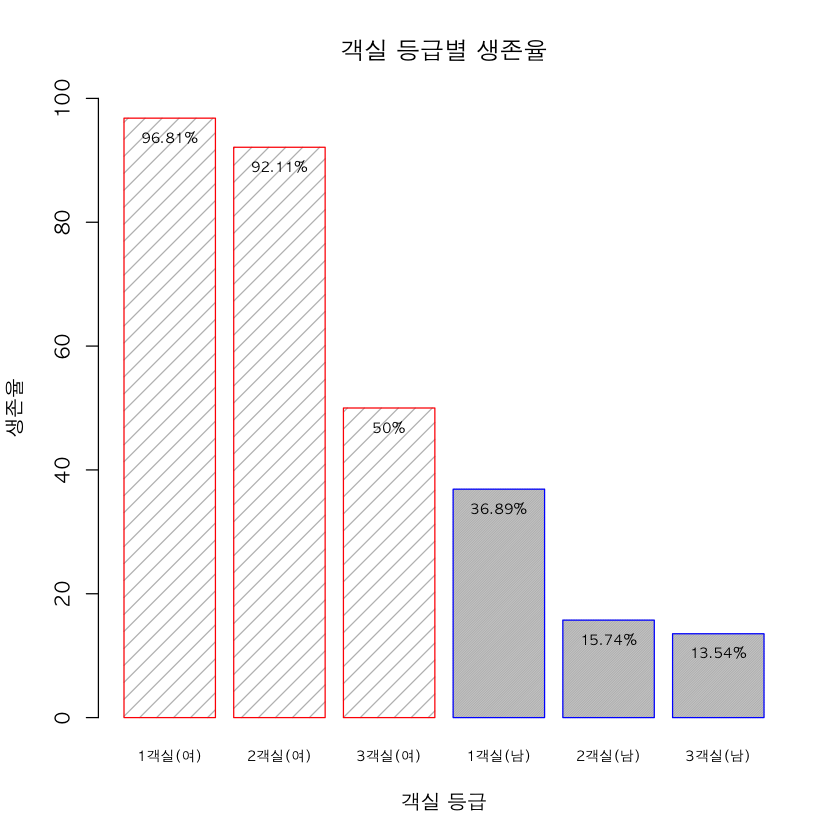

In [35]:
par(family = "AppleGothic")
barplot(ratio,
        beside = T,
        ylim = c(0, 100),
        names = pltnames,
        space = 0.2,
        border = c(rep("red", 3), rep("blue", 3) ),
        main = "객실 등급별 생존율",
        xlab = "객실 등급",
        ylab = "생존율",
        cex.names = 0.7,
        density = c(rep(10,3), rep(100,3))
       )
 for (i in 1:6) {
     text(1.2 * i - 0.5,ratio[i] -3,paste(ratio[i],"%",sep=""), cex = 0.7, )
 }

> [Survived] <- [Sex, Pclass]

In [36]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### Embarked(항구의 위치)

In [37]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [38]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [39]:
# 빈칸의 데이터 찾기
subset(train_df, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [40]:
# 제일 많은 운임을 지불한 사람
subset(train_df, Fare == max(train_df$Fare))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [41]:
mean(train_df$Fare)

[1] 32.20421

In [42]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정
# S 항구 탑승인원
sum(train_df$Embarked == "S")
# C 항구 탑승인원
sum(train_df$Embarked == "C")
# Q 항구 탑승인원
sum(train_df$Embarked == "Q")

[1] 644

[1] 168

[1] 77

> 빈값 항구를 S항구로 변경

In [43]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [44]:
# 빈칸 항구 찾기 - 1
subset(train_df_T, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [45]:
# 빈칸 항구 찾기 - 2
train_df_T[train_df_T$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [46]:
# 빈칸 항구 S항구로 변경 - 1
train_df_T$Embarked <- ifelse(train_df_T$Embarked == "", "S", train_df_T$Embarked)

In [47]:
train_df_T[train_df_T$Embarked == "",]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [48]:
# 빈칸 항구 S항구로 변경 - 2
train_df_T <- train_df

In [49]:
train_df_T[train_df_T$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [50]:
train_df_T[train_df_T$Embarked == "",]$Embarked <- "S"

In [51]:
# 빈칸 항구 S항구로 변경 - 3
train_df_T <- train_df

In [52]:
train_df_T$Embarked[train_df_T$Emabarked == ""] <- "S"

---

In [53]:
train_df$Embarked[train_df$Embarked == ""] <- "S"

In [54]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [55]:
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


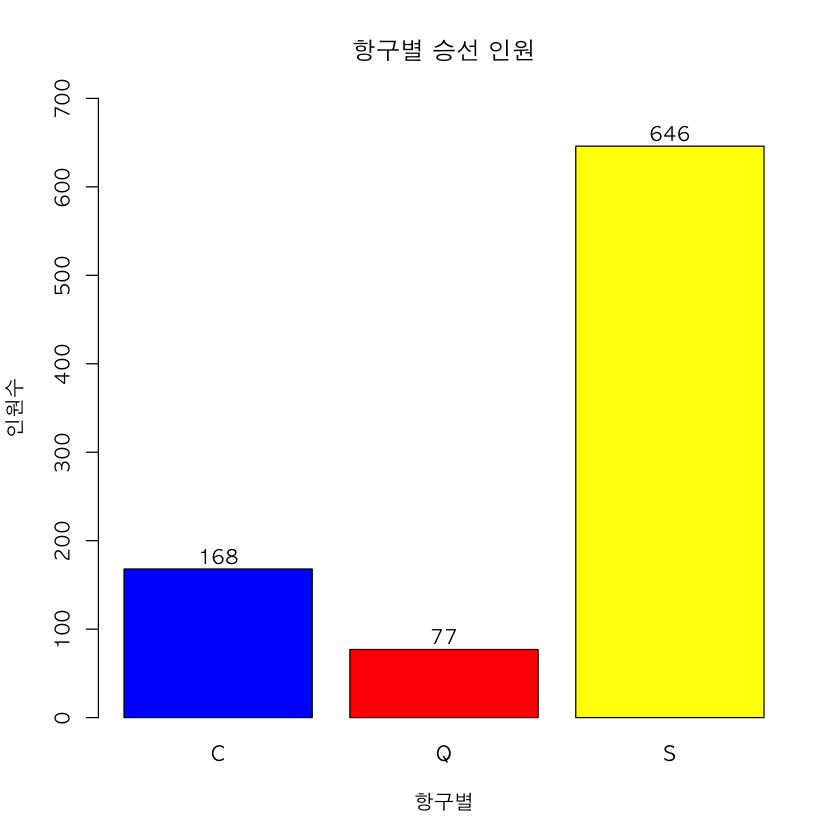

In [56]:
# 항구별 승선 인원
par(family = "AppleGothic")
barplot(table(train_df$Embarked),
        ylim = c(0,700),
        col = c("blue", "red", "yellow"),
        main = "항구별 승선 인원",
        xlab = "항구별",
        ylab = "인원수"
       )
for (i in 1:length(table(train_df$Embarked))) {
    text(1.2 * i - 0.5, table(train_df$Embarked)[i] + 15, table(train_df$Embarked)[i])
}

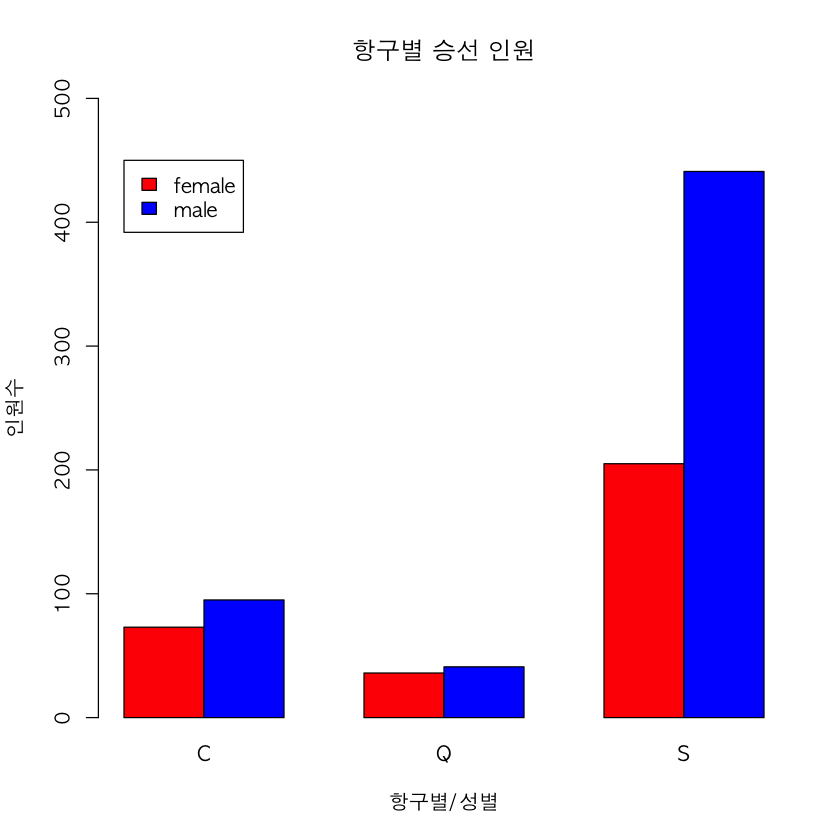

In [57]:
# 항구별 성별 승선 인원
par(family = "AppleGothic")
barplot(table(train_df$Sex, train_df$Embarked),
        beside = T,
        ylim = c(0,500),
        col = c("red", "blue"),
        main = "항구별 승선 인원",
        xlab = "항구별/성별",
        ylab = "인원수"
       )
legend(1,450,c("female","male"),
       cex = 1,
       fill = c("red", "blue")
      )

In [58]:
nrow(subset(train_df, Sex == "male" & Embarked == 'S' & Pclass == 3)) / nrow(subset(train_df, Sex == "male"  & Pclass == 3))

[1] 0.7636888

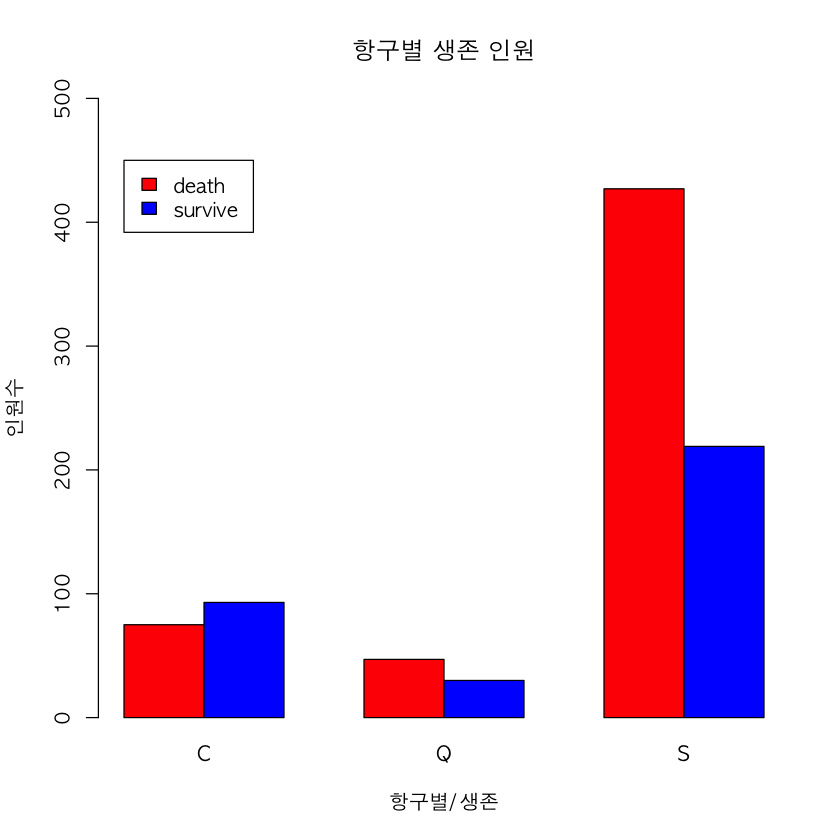

In [59]:
# 항구별 생존 인원
par(family = "AppleGothic")
barplot(table(train_df$Survived, train_df$Embarked),
        beside = T,
        ylim = c(0,500),
        col = c("red", "blue"),
        main = "항구별 생존 인원",
        xlab = "항구별/생존",
        ylab = "인원수"
       )
legend(1,450,c("death","survive"),
       cex = 1,
       fill = c("red", "blue")
      )

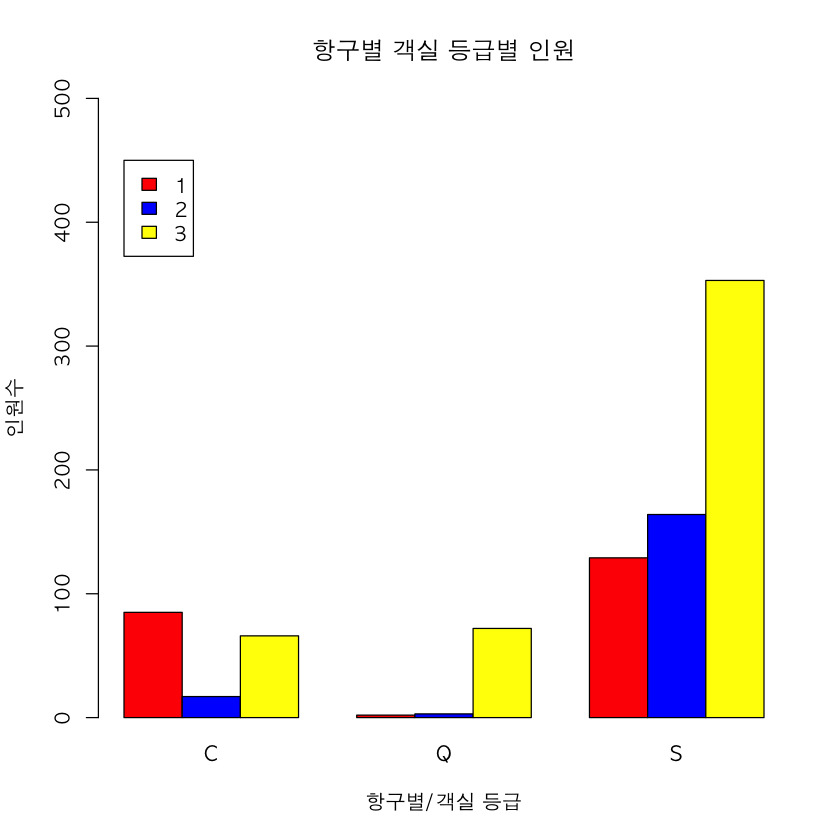

In [60]:
# 항구별 객실 등급별 인원
par(family = "AppleGothic")
barplot(table(train_df$Pclass, train_df$Embarked),
        beside = T,
        ylim = c(0,500),
        col = c("red", "blue", "yellow"),
        main = "항구별 객실 등급별 인원",
        xlab = "항구별/객실 등급",
        ylab = "인원수"
       )
legend(1,450,1:3,
       cex = 1,
       fill = c("red", "blue", "yellow")
      )

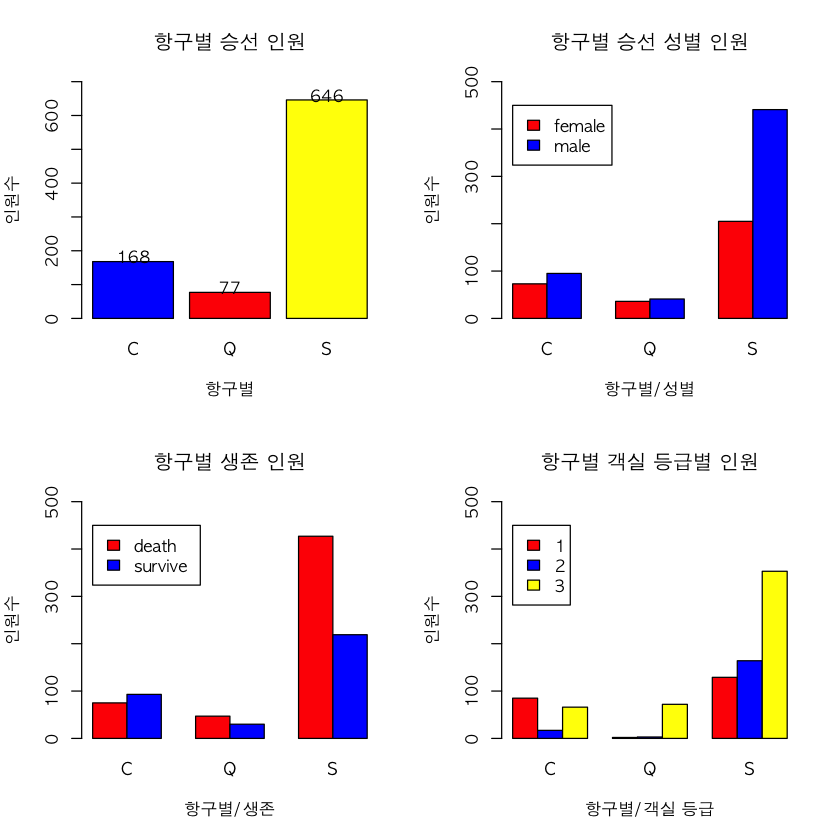

In [61]:
# 그래프 한눈에 보기
par(mfrow = c(2,2), family = "AppleGothic")

barplot(table(train_df$Embarked),
        ylim = c(0,700),
        col = c("blue", "red", "yellow"),
        main = "항구별 승선 인원",
        xlab = "항구별",
        ylab = "인원수"
       )
for (i in 1:length(table(train_df$Embarked))) {
    text(1.2 * i - 0.5, table(train_df$Embarked)[i] + 15, table(train_df$Embarked)[i])
}

barplot(table(train_df$Sex, train_df$Embarked),
        beside = T,
        ylim = c(0,500),
        col = c("red", "blue"),
        main = "항구별 승선 성별 인원",
        xlab = "항구별/성별",
        ylab = "인원수"
       )
legend(1,450,c("female","male"),
       cex = 1,
       fill = c("red", "blue")
      )

barplot(table(train_df$Survived, train_df$Embarked),
        beside = T,
        ylim = c(0,500),
        col = c("red", "blue"),
        main = "항구별 생존 인원",
        xlab = "항구별/생존",
        ylab = "인원수"
       )
legend(1,450,c("death","survive"),
       cex = 1,
       fill = c("red", "blue")
      )

barplot(table(train_df$Pclass, train_df$Embarked),
        beside = T,
        ylim = c(0,500),
        col = c("red", "blue", "yellow"),
        main = "항구별 객실 등급별 인원",
        xlab = "항구별/객실 등급",
        ylab = "인원수"
       )
legend(1,450,1:3,
       cex = 1,
       fill = c("red", "blue", "yellow")
      )

---
# RandomForest로 예측 모델 생성

In [62]:
# 복사본
train_df_T <- train_df

In [63]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived", "Sex", "Pclass", "Embarked")
head(train_df_T[, target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [64]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [65]:
tail(train_df_T)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [66]:
# Sex컬럼 삭제
train_df_T <- subset(train_df_T, select = -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [67]:
target_col <- c("Survived", "SexCode", "Pclass", "Embarked")
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


### Embarked를 숫자로 전환
C = 0, S = 1, Q = 2 -> 맞긴 맞지만 좋은 생각이 아니다.   
2 * S = Q ?

### One-Hot Encoding 방법
C == [1,0,0]   
S == [0,1,0]   
Q == [0,0,1]
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해 진다.   
R은 내부적으로 1은 True, 0은 False.  


In [68]:
train_df_T$Embarked_C <- train_df_T$Embarked == "C"
train_df_T$Embarked_S <- train_df_T$Embarked == "S"
train_df_T$Embarked_Q <- train_df_T$Embarked == "Q"
head(train_df_T[c("Embarked", "Embarked_C", "Embarked_S", "Embarked_Q")])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [69]:
target_col <- c("Survived", "Pclass", "SexCode", "Embarked_C", "Embarked_S", "Embarked_Q")
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [70]:
train_data <- train_df_T[,target_col]

In [71]:
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [72]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [73]:
library(randomForest)
library(nnet)
library(caret)
library(party)
library(e1071)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [74]:
# Sampling
set.seed(1234)
samp <- createDataPartition(train_data$Survived, p = 0.7, list = F)

In [75]:
length(samp)

[1] 624

In [76]:
# 학습용
data.train <- train_data[samp,]
# 검증용
data.test <- train_data[-samp,]
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [77]:
# 학습시키기
model.rf <- randomForest(Survived ~ ., data=data.train, ntree = 100)

In [78]:
# 검증하기
pred <- predict(model.rf, x)
pred[pred <= 0.5] <- 0
pred[pred > 0.5] <- 1

In [79]:
table(pred)

pred
  0   1 
205  62 

In [80]:
mean(pred == y)

[1] 0.7790262

In [81]:
table(pred, y)

    y
pred   0   1
   0 156  49
   1  10  52

---
### Survived를 factor로 변환 후에 randomForest 실행

In [82]:
train_data[,1] <- as.factor(train_data[,1])
data.train <- train_data[samp,]
data.test <- train_data[-samp,]
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [83]:
model.rf <- randomForest(Survived ~ ., data=data.train, ntree = 100)

In [84]:
pred <- predict(model.rf, x)

In [85]:
table(pred)

pred
  0   1 
205  62 

In [86]:
mean(pred == y)
table(pred,y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [87]:
model.nnet <- nnet(Survived ~ ., data=data.train, size = 3)
pred <- predict(model.nnet, x, type="class" )
mean(pred == y)
table(pred,y)

# weights:  22
initial  value 427.825740 
iter  10 value 294.250115
iter  20 value 259.763176
iter  30 value 258.132133
iter  40 value 258.027269
iter  50 value 257.959894
iter  60 value 257.880570
iter  70 value 257.667377
iter  80 value 257.593717
iter  90 value 257.546649
iter 100 value 257.543365
final  value 257.543365 
stopped after 100 iterations


[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [88]:
model.ctree <- ctree(Survived ~ ., data=data.train)
pred <- predict(model.ctree, x)
mean(pred == y)
table(pred,y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [89]:
model.svm <- svm(Survived ~ ., data=data.train)
pred <- predict(model.svm, x)
mean(pred == y)
table(pred,y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [90]:
model.multinom <- multinom(Survived ~ ., data=data.train)
pred <- predict(model.multinom, x)
mean(pred == y)
table(pred,y)

# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged


[1] 0.7715356

    y
pred   0   1
   0 135  30
   1  31  71

In [91]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


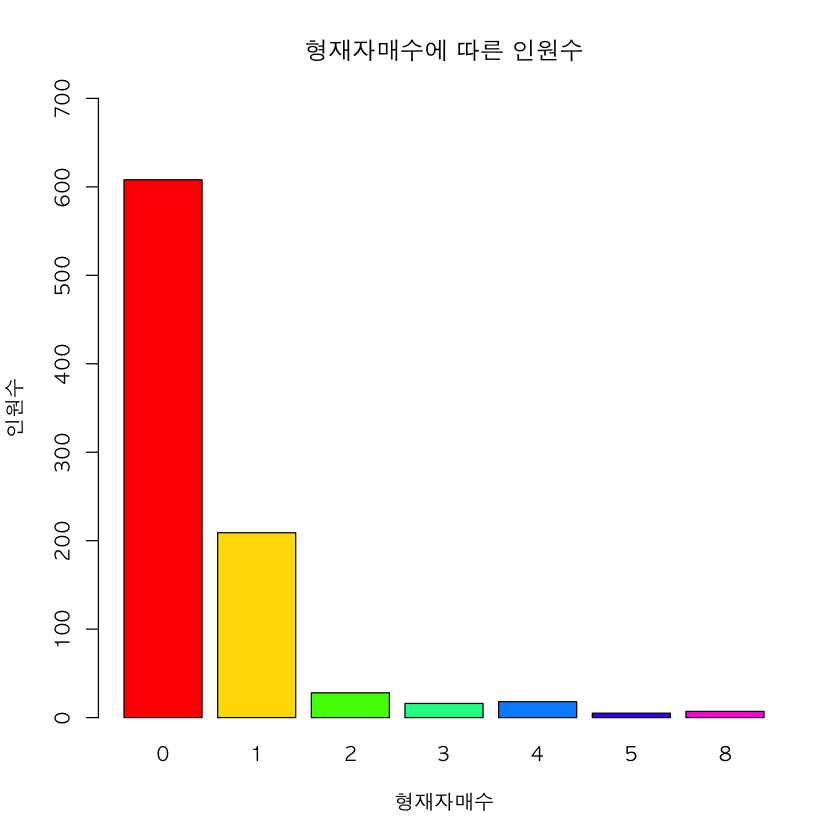

In [92]:
par(family = "AppleGothic")
barplot(table(train_df$SibSp),
        ylim = c(0,700),
        col = rainbow(length(table(train_df$SibSp))),
        xlab = "형재자매수",
        ylab = "인원수",
        main = "형재자매수에 따른 인원수"
       )

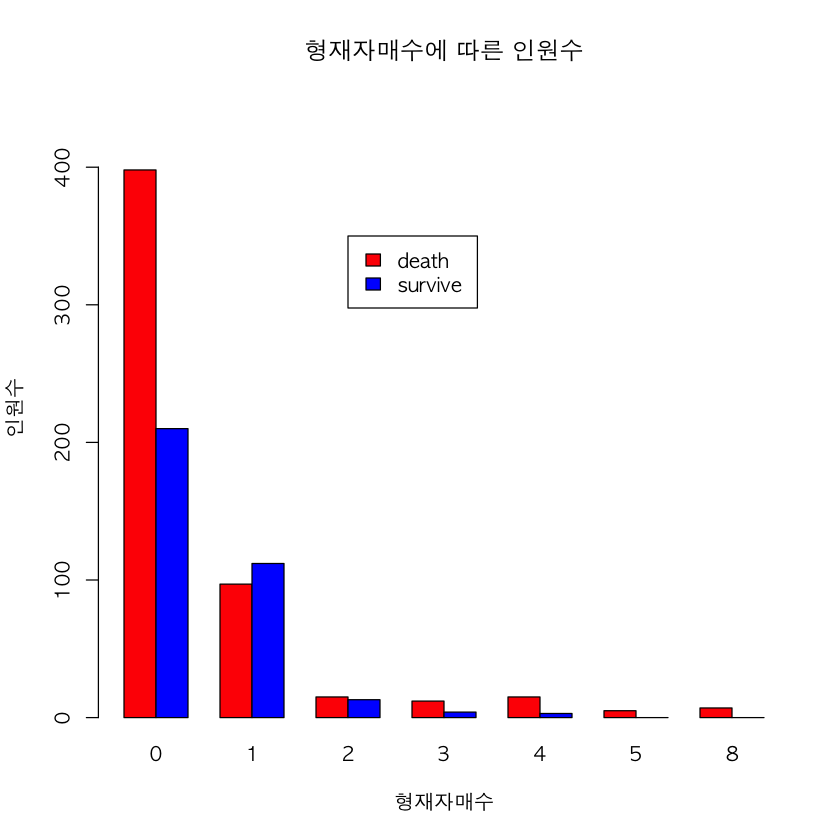

In [93]:
par(family = "AppleGothic")
barplot(table(train_df$Survived, train_df$SibSp),
        beside = T,
        ylim = c(0,450),
        col = c("red","blue"),
        xlab = "형재자매수",
        ylab = "인원수",
        main = "형재자매수에 따른 인원수"
       )
legend(8,350,c("death","survive"),
       cex = 1,
       fill = c("red", "blue")
      )

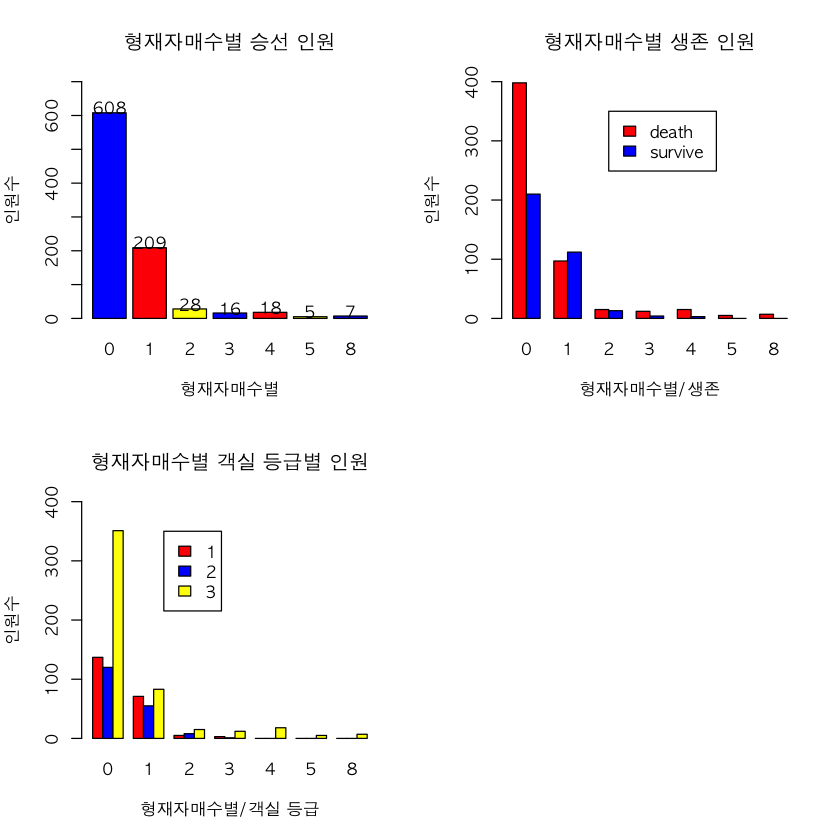

In [94]:
# 그래프 한눈에 보기
par(mfrow = c(2,2), family = "AppleGothic")

barplot(table(train_df_T$SibSp),
        ylim = c(0,700),
        col = c("blue", "red", "yellow"),
        main = "형재자매수별 승선 인원",
        xlab = "형재자매수별",
        ylab = "인원수"
       )
for (i in 1:length(table(train_df_T$SibSp))) {
    text(1.2 * i - 0.5, table(train_df_T$SibSp)[i] + 15, table(train_df_T$SibSp)[i])
}

# barplot(table(train_df$Sex, train_df$SibSp),
#         beside = T,
#         ylim = c(0,500),
#         col = c("red", "blue"),
#         main = "형재자매수별 승선 성별 인원",
#         xlab = "형재자매수별/성별",
#         ylab = "인원수"
#        )
# legend(8,450,c("female","male"),
#        cex = 1,
#        fill = c("red", "blue")
#       )

barplot(table(train_df_T$Survived, train_df_T$SibSp),
        beside = T,
        ylim = c(0,400),
        col = c("red", "blue"),
        main = "형재자매수별 생존 인원",
        xlab = "형재자매수별/생존",
        ylab = "인원수"
       )
legend(8,350,c("death","survive"),
       cex = 1,
       fill = c("red", "blue")
      )

barplot(table(train_df_T$Pclass, train_df_T$SibSp),
        beside = T,
        ylim = c(0,400),
        col = c("red", "blue", "yellow"),
        main = "형재자매수별 객실 등급별 인원",
        xlab = "형재자매수별/객실 등급",
        ylab = "인원수"
       )
legend(8,350,1:3,
       cex = 1,
       fill = c("red", "blue", "yellow")
      )

In [95]:
train_df_T$SibSp[train_df_T$SibSp > 0] <- 1

In [96]:
table(train_df_T$SibSp)


  0   1 
608 283 

In [97]:
target_col <- c("Survived", "Pclass", "SexCode", "Embarked_C", "Embarked_S", "Embarked_Q",
               "SibSp")
train_data <- train_df_T[,target_col]

In [98]:
train_data

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q,SibSp
0,3,0,FALSE,TRUE,FALSE,1
0,3,0,FALSE,TRUE,FALSE,0
0,3,0,FALSE,FALSE,TRUE,0
0,1,0,FALSE,TRUE,FALSE,0
0,3,0,FALSE,TRUE,FALSE,1
0,3,0,FALSE,TRUE,FALSE,0
0,3,0,FALSE,TRUE,FALSE,1
0,3,1,FALSE,TRUE,FALSE,0
0,3,0,FALSE,FALSE,TRUE,1
0,3,1,FALSE,TRUE,FALSE,1


In [99]:
set.seed(1234)
samp <- c(sample(1:549, 341*0.7 ), 
          sample(550:nrow(train_data), 341*0.7 ))

In [100]:
341 * 0.7

[1] 238.7

In [101]:
length(samp)

[1] 476

In [102]:
train_data[,1] <- as.factor(train_data[,1])
data.train <- train_data[samp,]
data.test <- train_data[-samp,]
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [103]:
model.multinom <- multinom(Survived ~ ., data=data.train)
pred <- predict(model.multinom, x)
mean(pred == y)
table(pred,y)

# weights:  8 (7 variable)
initial  value 329.938058 
iter  10 value 225.398241
final  value 225.396702 
converged


[1] 0.7855422

    y
pred   0   1
   0 252  30
   1  59  74